# YOLO Efficient Net Model Training

In [17]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [19]:
B = 2
NUM_CLASSES = 20
NUM_FILTERS = 512
OUTPUT_DIM = NUM_CLASSES + 5*B
H, W = 224, 224
SPLIT_SIZE = H//32
BATCH_SIZE = 32

In [20]:
trainDataset = tf.data.Dataset.load('SavedDataset/trainDataset')
valDataset = tf.data.Dataset.load('SavedDataset/valDataset')
print(trainDataset)
print(valDataset)

<_LoadDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None))>
<_LoadDataset element_spec=(TensorSpec(shape=(224, 224, None), dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.float32, name=None))>


In [21]:
trainDataset = trainDataset.map(lambda x, y: (
    tf.ensure_shape(x, [224, 224, 3]),  # Ensure 3 channels (RGB)
    tf.ensure_shape(y, [7, 7, NUM_CLASSES + 5])  # Ensure labels are correctly shaped
))
valDataset = valDataset.map(lambda x, y: (
    tf.ensure_shape(x, [224, 224, 3]),
    tf.ensure_shape(y, [7, 7, NUM_CLASSES + 5])
))

trainDataset = trainDataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valDataset = valDataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(trainDataset)
print(valDataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7, 7, 25), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7, 7, 25), dtype=tf.float32, name=None))>


In [22]:
model = tf.keras.models.load_model('Models/YoloEfficientNetUntrained.keras')

In [23]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb1 (Functional)     │ (None, 7, 7, 1280)     │     6,575,239 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 7, 7, 512)      │     5,898,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_38 (LeakyReLU)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_39 (LeakyReLU)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_40 (LeakyReLU)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_41 (LeakyReLU)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_42 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1470)           │       754,110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 7, 7, 30)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,161,285 (126.50 MB)

 Trainable params: 26,581,950 (101.40 MB)

 Non-trainable params: 6,579,335 (25.10 MB)

## YOLO Loss

In [24]:
def computeIOU(boxes1, boxes2): # Intersection over Union
    # Extract coordinates as xMin, yMin, xMax, yMax from xCenter, yCenter, width, height
    boxes1 = tf.stack([boxes1[..., 0] - boxes1[..., 2] / 2.0,
                       boxes1[..., 1] - boxes1[..., 3] / 2.0,
                       boxes1[..., 0] + boxes1[..., 2] / 2.0,
                       boxes1[..., 1] + boxes1[..., 3] / 2.0], axis=-1)
    boxes2 = tf.stack([boxes2[..., 0] - boxes2[..., 2] / 2.0,
                          boxes2[..., 1] - boxes2[..., 3] / 2.0,
                          boxes2[..., 0] + boxes2[..., 2] / 2.0,
                          boxes2[..., 1] + boxes2[..., 3] / 2.0], axis=-1)
    
    # Calculate intersection coordinates
    lu = tf.maximum(boxes1[..., :2], boxes2[..., :2])
    rd = tf.minimum(boxes1[..., 2:], boxes2[..., 2:])

    # Calculate intersection area
    intersection = tf.maximum(0.0, rd - lu)
    intersectionArea = intersection[..., 0] * intersection[..., 1] # W * H

    # Calculate union area
    boxes1Area = (boxes1[..., 2] - boxes1[..., 0]) * (boxes1[..., 3] - boxes1[..., 1])
    boxes2Area = (boxes2[..., 2] - boxes2[..., 0]) * (boxes2[..., 3] - boxes2[..., 1])
    unionArea = tf.maximum(boxes1Area + boxes2Area - intersectionArea, 1e-10)

    # Calculate IoU
    iou = intersectionArea / unionArea

    return tf.clip_by_value(iou, 0.0, 1.0)

    
def yoloLoss(yTrue, yPred):
    target = yTrue[..., 0] # Gets a tensor shape(7, 7, ) with first elements of each row, i.e, 1 or 0

    ##### Objectness Loss #####
    yPredExtract = tf.gather_nd(yPred, tf.where(target[:] == 1)) # Gets the predicted tensors where target is 1
    yTrueExtract = tf.gather_nd(yTrue, tf.where(target[:] == 1)) # Gets the true tensors where target is 1

    rescaler = tf.where(target[:] == 1)*SPLIT_SIZE # Gets the indices of the true tensors where target is 1 and multiplies by 7 to get New Origin with respect to the cell
    upscaler1 = tf.concat([rescaler[:, 1:], tf.zeros([tf.shape(rescaler)[0], 2], dtype=tf.int64)], axis=-1) # Removes batch dimension and adds 0s to the end for width and height    
    
    # Gets the tensors and multiplies values by 32, 32, 224, 224 to get correct centres, with respect to cell origin & height and width with respect to image
    targetUpscaler2 = tf.repeat([[32.,32.,224.,224.]],repeats=[tf.shape(rescaler)[0]], axis=0)*tf.cast(yTrueExtract[...,1:5], dtype = tf.float32)
    pred1Upscaler2 = tf.repeat([[32.,32.,224.,224.]],repeats=[tf.shape(rescaler)[0]], axis=0)*tf.cast(yPredExtract[...,1:5], dtype = tf.float32)
    pred2Upscaler2 = tf.repeat([[32.,32.,224.,224.]],repeats=[tf.shape(rescaler)[0]], axis=0)*tf.cast(yPredExtract[...,6:10], dtype = tf.float32)
    
    # Gets the original tensors with respect to the image
    targetOriginal = tf.cast(upscaler1, dtype=tf.float32) + targetUpscaler2
    pred1Original = tf.cast(upscaler1, dtype=tf.float32) + pred1Upscaler2
    pred2Original = tf.cast(upscaler1, dtype=tf.float32) + pred2Upscaler2

    # Calculates the IoU of the predicted and true tensors & choose the correct box to find object in -> outputs [0, 1] / [1, 0]
    mask = tf.cast(tf.math.greater(computeIOU(pred1Original, targetOriginal), computeIOU(pred2Original, targetOriginal)), dtype=tf.int32)

    # Choosing the correct box
    yPredJoined = tf.transpose(tf.concat([tf.expand_dims(yPredExtract[..., 0], axis=0), tf.expand_dims(yPredExtract[..., 5], axis=0)], axis=0))
    objPrediction = tf.gather_nd(yPredJoined, tf.stack([tf.range(tf.shape(rescaler)[0]), mask], axis=-1))

    # Objectness Loss
    objLoss = tf.reduce_sum(tf.square(tf.cast(tf.ones([tf.shape(rescaler)[0]]), dtype=tf.float32) - tf.cast(objPrediction, dtype=tf.float32)))

    ##### Non-Objectness Loss ##### 
    yPredExtract = tf.gather_nd(yPred[..., 0:B*5], tf.where(target[:] == 0)) # Gets the predicted tensors where target is 0
    yTrueExtract = tf.zeros(tf.shape(yPredExtract)[0])

    noObjectLoss1 = tf.reduce_sum(tf.square(tf.cast(yTrueExtract, dtype=tf.float32) - tf.cast(yPredExtract[..., 0], dtype=tf.float32)))
    noObjectLoss2 = tf.reduce_sum(tf.square(tf.cast(yTrueExtract, dtype=tf.float32) - tf.cast(yPredExtract[..., 5], dtype=tf.float32)))

    noObjectLoss = noObjectLoss1 + noObjectLoss2

    ##### Class Loss #####
    yPredExtract = tf.gather_nd(yPred[..., 10:], tf.where(target[:] == 1)) # Gets the predicted tensors where target is 1
    yTrueExtract = tf.gather_nd(yTrue[..., 5:], tf.where(target[:] == 1)) # Gets the true tensors where target is 1

    classLoss = tf.reduce_sum(tf.square(tf.cast(yTrueExtract, dtype=tf.float32) - tf.cast(yPredExtract, dtype=tf.float32)))

    ##### Box Loss #####
    # Centre Loss
    yPredExtract = tf.gather_nd(yPred[..., 0:5*B], tf.where(target[:] == 1)) # Gets the predicted tensors where target is 1
    centreJoined = tf.stack([yPredExtract[..., 1:3], yPredExtract[..., 6:8]], axis=1)

    centrePred = tf.gather_nd(centreJoined, tf.stack([tf.range(tf.shape(rescaler)[0]), mask], axis=-1))
    centreTrue = tf.gather_nd(yTrue[..., 1:3], tf.where(target[:] == 1))

    centreLoss = tf.reduce_sum(tf.square(tf.cast(centreTrue, dtype=tf.float32) - tf.cast(centrePred, dtype=tf.float32)))

    # Size Loss
    sizeJoined = tf.stack([yPredExtract[..., 3:5], yPredExtract[..., 8:10]], axis=1)

    sizePred = tf.gather_nd(sizeJoined, tf.stack([tf.range(tf.shape(rescaler)[0]), mask], axis=-1))
    sizeTrue = tf.gather_nd(yTrue[..., 3:5], tf.where(target[:] == 1))

    sizeLoss = tf.reduce_sum(tf.square(tf.cast(tf.sqrt(tf.abs(sizeTrue)), dtype=tf.float32) - tf.cast(tf.sqrt(tf.abs(sizePred)), dtype=tf.float32)))

    # Total Box Loss
    boxLoss = centreLoss + sizeLoss

    ##### Total Loss #####
    lambdaCoord = 5
    lambdaNoObj = 0.5
    totalLoss = objLoss + lambdaNoObj*noObjectLoss + lambdaCoord*boxLoss + classLoss
    return totalLoss

## Model Checkpoints

In [25]:
checkpoint_path = 'Models/checkpoints/YoloEfficientNet.keras'
modelCheckpointCallback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

In [26]:
def scheduler(epoch, lr):
    if epoch < 40:
        return 1e-3
    elif epoch>=40 and epoch<80:
        return 5e-4
    else:
        return 1e-4
learningRateCallback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Compile & Train Model

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=yoloLoss)

In [28]:
history = model.fit(
    trainDataset,
    validation_data=valDataset,
    epochs=135,
    verbose=1,
    callbacks=[modelCheckpointCallback, learningRateCallback]
)

Epoch 1/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 169s 289ms/step - loss: 272.1904 - val_loss: 206.0511 - learning_rate: 0.0010
Epoch 2/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 126s 235ms/step - loss: 174.6718 - val_loss: 184.2780 - learning_rate: 0.0010
Epoch 3/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 125s 233ms/step - loss: 159.9105 - val_loss: 178.2578 - learning_rate: 0.0010
Epoch 4/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 125s 235ms/step - loss: 150.0510 - val_loss: 169.0949 - learning_rate: 0.0010
Epoch 5/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 134s 251ms/step - loss: 140.9000 - val_loss: 166.5185 - learning_rate: 0.0010
Epoch 6/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 125s 234ms/step - loss: 132.9558 - val_loss: 161.8071 - learning_rate: 0.0010
Epoch 7/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 125s 235ms/step - loss: 125.5745 - val_loss: 160.9096 - learning_rate: 0.0010
Epoch 8/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 123s 231ms/step - loss: 118.5706 - val_loss: 158.0808 - learning_rate: 0.0010
Epoch 9/135
534/534 ━━━━━━━━━━━━━━━━━━━━ 120s 22

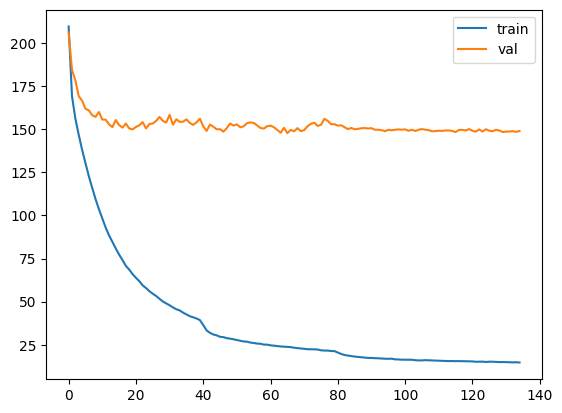

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()